## Climate Change

There have been many studies documenting that the average global temperature has been increasing over the last century. The consequences of a continued rise in global temperature will be dire. Rising sea levels and an increased frequency of extreme weather events will affect billions of people.

In this problem, we will attempt to study the relationship between average global temperature and several other factors.





In [1]:
#import libraries 
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import random
import matplotlib.pyplot as plt
%matplotlib inline


## `1.` Read the dataset

In [2]:
# Read the data and show a small part of the dataframe to get an understaning of what is in there
cl = pd.read_csv('asset-v1_MITx+15.071x+2T2017+type@asset+block@climate_change.csv')
cl.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


The file climate_change.csv contains climate data from May 1983 to December 2008. The available variables include:

**Year**: the observation year.

**Month**: the observation month.

***Temp:** the difference in degrees Celsius between the average global temperature in that period and a reference value. This data comes from the Climatic Research Unit at the University of East Anglia.

***CO2, N2O, CH4, CFC.11, CFC.12:** atmospheric concentrations of carbon dioxide (CO2), nitrous oxide (N2O), methane  (CH4), trichlorofluoromethane (CCl3F; commonly referred to as CFC-11) and dichlorodifluoromethane (CCl2F2; commonly referred to as 
CFC-12), respectively. This data comes from the ESRL/NOAA Global Monitoring Division.

***CO2, N2O and CH4 are expressed in ppmv (parts per million by volume**  -- i.e., 397 ppmv of CO2 means that CO2 constitutes 397 millionths of the total volume of the atmosphere)

***CFC.11 and CFC.12 are expressed in ppbv** (parts per billion by volume). 

***Aerosols:** the mean stratospheric aerosol optical depth at 550 nm. This variable is linked to volcanoes, as volcanic eruptions result in new particles being added to the atmosphere, which affect how much of the sun's energy is reflected back into space. 

This data is from the Godard Institute for Space Studies at NASA.

***TSI: the total solar irradiance (TSI) in W/m2** (the rate at which the sun's energy is deposited per unit area). Due to sunspots and other solar phenomena, the amount of energy that is given off by the sun varies substantially with time. This data is from the SOLARIS-HEPPA project website.

***MEI: multivariate El Nino Southern Oscillation index (MEI)**, a measure of the strength of the El Nino/La Nina-Southern Oscillation (a weather effect in the Pacific Ocean that affects global temperatures). This data comes from the ESRL/NOAA Physical Sciences Division.

In [3]:
# get the total number of rows in the dataframe
n_rows = cl.shape[0]
print('number of rows is :', n_rows)

number of rows is : 308


In [4]:
# get the number of unique values in the year column
cl.Year.nunique()

26

The data has 26 years of unique entries in the year column

In [5]:
cl.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


<AxesSubplot:>

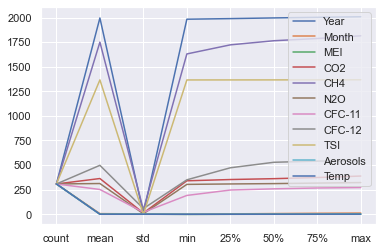

In [6]:
cl.describe(include='all').plot()

In [7]:
cl.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
Year,308.0,1995.662338,7.423197,1983.0000,1989.00000,1996.00000,2002.00000,2008.0000
Month,308.0,6.551948,3.447214,1.0000,4.00000,7.00000,10.00000,12.0000
MEI,308.0,0.275555,0.937918,-1.6350,-0.39875,0.23750,0.83050,3.0010
CO2,308.0,363.226753,12.647125,340.1700,353.02000,361.73500,373.45500,388.5000
CH4,308.0,1749.824513,46.051678,1629.8900,1722.18250,1764.04000,1786.88500,1814.1800
N2O,308.0,312.391834,5.225131,303.6770,308.11150,311.50700,316.97900,322.1820
CFC-11,308.0,251.973068,20.231783,191.3240,246.29550,258.34400,267.03100,271.4940
CFC-12,308.0,497.524782,57.826899,350.1130,472.41075,528.35600,540.52425,543.8130
TSI,308.0,1366.070759,0.399610,1365.4261,1365.71705,1365.98090,1366.36325,1367.3162
Aerosols,308.0,0.016657,0.029050,0.0016,0.00280,0.00575,0.01260,0.1494


Adding the "include=All" did not change the outcome in the describe method because all the columns have numerical values

In [8]:
cl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308 entries, 0 to 307
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      308 non-null    int64  
 1   Month     308 non-null    int64  
 2   MEI       308 non-null    float64
 3   CO2       308 non-null    float64
 4   CH4       308 non-null    float64
 5   N2O       308 non-null    float64
 6   CFC-11    308 non-null    float64
 7   CFC-12    308 non-null    float64
 8   TSI       308 non-null    float64
 9   Aerosols  308 non-null    float64
 10  Temp      308 non-null    float64
dtypes: float64(9), int64(2)
memory usage: 26.6 KB


From the `info` function, all the data is full and we have no missing data in the dataset

In [9]:
# get the number of records for each year 
nu_years = cl['Year'].value_counts()
print(nu_years)

2008    12
2007    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
1983     8
Name: Year, dtype: int64


In [10]:
## note the difference between the outcome in teh previous code and the
# code when the method ".to_fram()"
nu_years = cl['Year'].value_counts().to_frame()
print(nu_years)

      Year
2008    12
2007    12
1984    12
1985    12
1986    12
1987    12
1988    12
1989    12
1990    12
1991    12
1992    12
1993    12
1994    12
1995    12
1996    12
1997    12
1998    12
1999    12
2000    12
2001    12
2002    12
2003    12
2004    12
2005    12
2006    12
1983     8


In [11]:
nu_years.rename(columns = {'Year': 'year counts'}, inplace = True)
nu_years.index.name = 'year'
nu_years

,year counts
year,
2008,12
2007,12
1984,12
1985,12
1986,12
1987,12
1988,12
1989,12
1990,12


## `2.` Apply linear regression model |

build a linear regression model to predict the dependent variable `Temp`, using MEI, CO2, CH4, N2O, CFC.11, CFC.12, TSI, and Aerosols as independent variables (Year and Month should NOT be used in the model). Use the training set to build the model.

2.a Split the data into training and prediction 

In [12]:
# training data has all the data upto 2006
cl_training = cl[cl['Year']<2007]

# testing include all data after 2006
cl_testing = cl[cl['Year']>2006]

print(cl_training.shape[0]+cl_testing.shape[0] - cl.shape[0]) ## the value should be zero to make sure the split is correct

0


2.b pairplots to understand relations and heatmap to understand correlation

In [13]:
## define columns to go into the correlation heatmap
col_reasons = ['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols' ,'Temp']


C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


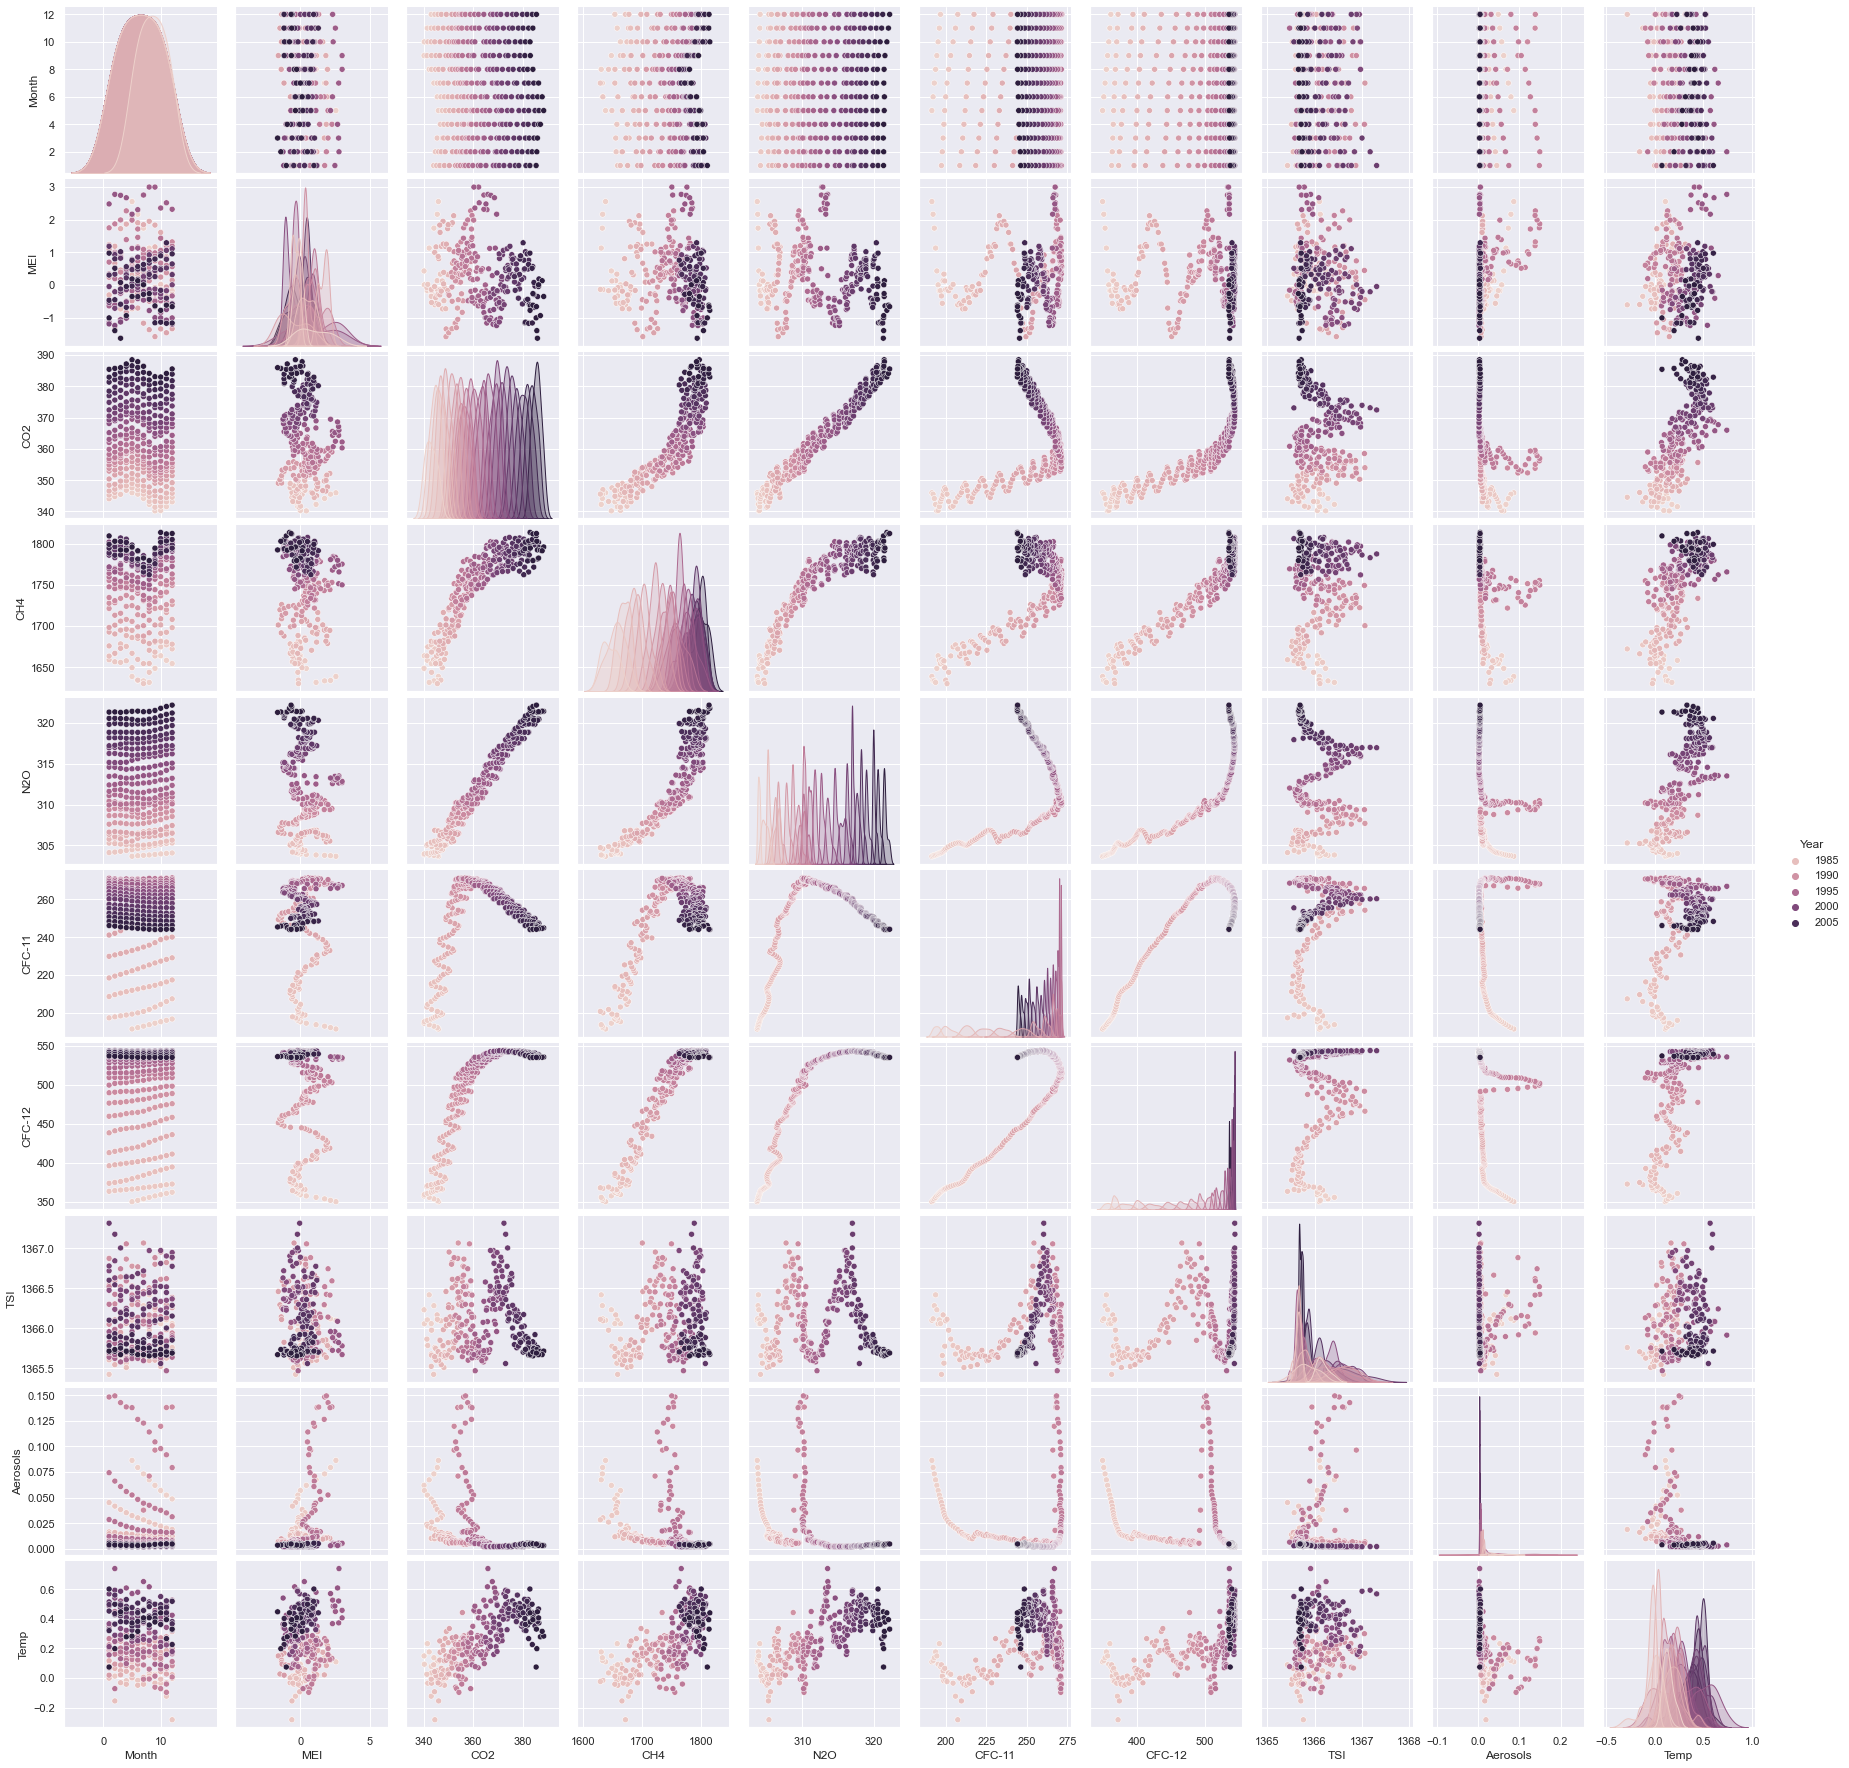

In [14]:
sns.pairplot(cl, hue='Year');

N2O increases with increasing CH4 and CO2. In addition, the concentrations increase on yearly basis in a linear like relation.
* The three incicators could be highly correlated together.

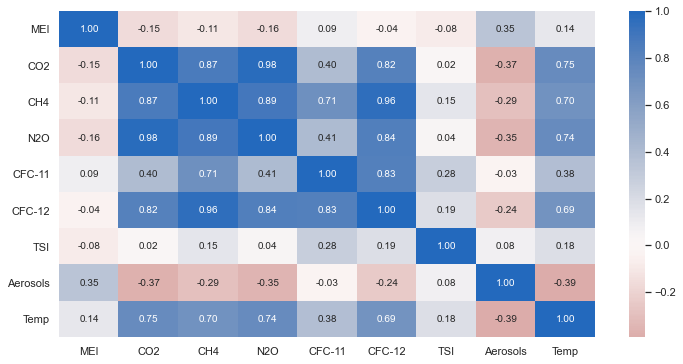

In [15]:
# correlation plot
plt.figure(figsize = [12, 6])
sns.heatmap(cl[col_reasons].corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

The correlation  map is highlighting the **high correlation between N2O, CH4 and CO2**.

2.c construct the model 

In [16]:
# import the statsmodels
import statsmodels.api as sm

# Define the intercept
cl_training['intercept'] = 1
# apply linear regression model 
lm = sm.OLS(cl_training['Temp'],cl_training[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols' , 'intercept']])
result = lm.fit()

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [17]:
# read the results summary 
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     103.6
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           1.94e-78
Time:                        20:40:00   Log-Likelihood:                 280.10
No. Observations:                 284   AIC:                            -542.2
Df Residuals:                     275   BIC:                            -509.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0642      0.006      9.923      0.000       0.051       0.077
CO2            0.0065      0.002      2.826      0.005       0.002       0.011
CH4            0.0001      0.001      0.240      0.810      -0.001       0.001
N2O           -0.0165      0.009     -1.930      0.055      -0.033       0.000
CFC-11        -0.0066      0.002     -4.078      0.000      -0.010      -0.003
CFC-12         0.0038      0.001      3.757      0.000       0.002       0.006
TSI            0.0931      0.015      6.313      0.000       0.064       0.122
Aerosols      -1.5376      0.213     -7.210      0.000      -1.957      -1.118
intercept   -124.5943     19.887     -6.265      0.000    -163.744     -85.445
==============================================================================
Omnibus:                        8.740   Durbin-Watson:                   0.956
Prob(Omnibus):                  0.013   Jarque-Bera (JB):               10.327
Skew:                           0.289   Prob(JB):                      0.00572
Kurtosis:                       3.733   Cond. No.                     8.53e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.53e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**`NOTE:`**
* Small R-squared means that the choosen independant variable (x) is not impacting the dependant variable (y).
* Large (close to 1) R-Squared means that the selected (x) is impacting the value of (y).

**R-squared** will always increase if you increase the number of independednt variables in the model.
**Adjusted R-squared** will decrease if you add an independant variable that does not help the model 

**Significance of a variable in a linear model depends on p-value** if pvalue is below 0.05, the variable is significant to the model.

## OR using `sklearn`

In [18]:
x = np.array(cl_training[['MEI','CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI','Aerosols']])
y = np.array(cl_training['Temp'])

In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression() #linearregression object
lm.fit(x, y)

LinearRegression()

In [20]:
#scores
lm.score(x,y)

0.7508932770523417

Note that the **R-squared error** produced by the **Stats module** is equal to the one produced by **SKlearn**.

In [21]:
# the predicted label is yhat
yhat = lm.predict(x)


In [22]:
# get the intercept and the coefficients of the linear model
print(lm.intercept_)
print(lm.coef_)

-124.59426040111438
[ 6.42053134e-02  6.45735927e-03  1.24041896e-04 -1.65280033e-02
 -6.63048889e-03  3.80810324e-03  9.31410835e-02 -1.53761324e+00]


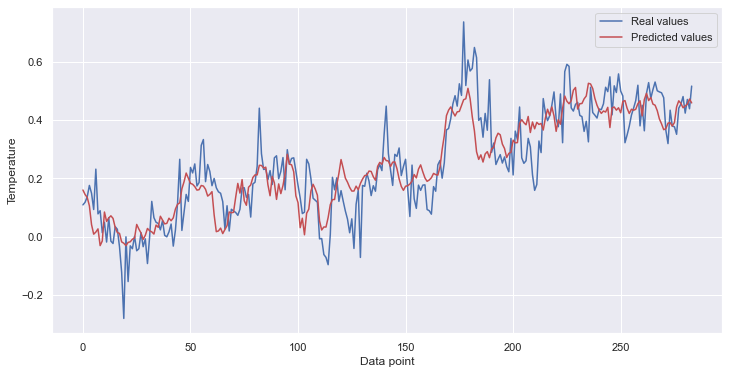

In [23]:
### plot the difference between the yhat and y
# note that we are at the training data
plt.figure(figsize = [12, 6])
plt.plot(y, color = 'b', label = 'Real values')
plt.plot(yhat, color = 'r', label = 'Predicted values')
plt.xlabel('Data point')
plt.ylabel('Temperature')
plt.legend()
plt.show();

Note that the predicted temperature values **yhat** is following the same trend as the actual measured data but not able to get the peaks and the minimum values.

C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Mustafa Adel\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


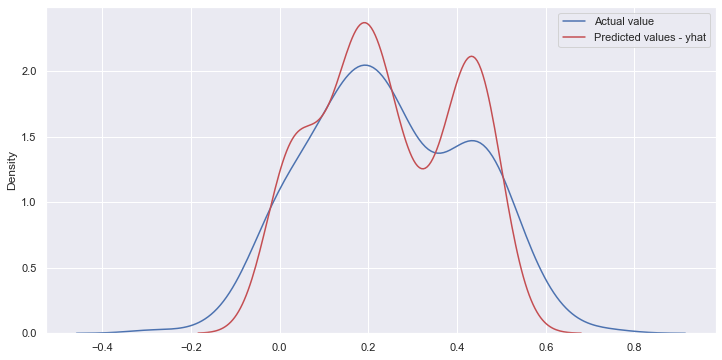

In [24]:
# plot the distribution of the predicted values and the actual values
plt.figure(figsize =[12, 6]);
ax1 = sns.distplot(y , hist=False , color= 'b' , label = 'Actual value');
sns.distplot(yhat, hist = False , color = 'r' , label = 'Predicted values - yhat', ax = ax1);
plt.legend();

The density plots are not affected by the number of bins which is a major parameter when histograms are to be considered, hence allows us to better visualize the distribution of our data.

So in summary it is just like a histogram but having a smooth curve drawn through the top of each bin.


`Reference:`
https://www.askpython.com/python/examples/density-plots-in-python

2.d Simplyfing the model 

In this step, will repeat the linear regression model again but with fewer number of independant variables by removing CH4 and CO2

In [25]:
lm2 = sm.OLS(cl_training['Temp'],cl_training[['MEI', 'TSI', 'Aerosols','intercept', 'N2O']])
result2 = lm2.fit()

In [26]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.722
Method:                 Least Squares   F-statistic:                     184.9
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           3.52e-77
Time:                        20:40:01   Log-Likelihood:                 266.64
No. Observations:                 284   AIC:                            -523.3
Df Residuals:                     279   BIC:                            -505.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
MEI            0.0642      0.007      9.649      0.000       0.051       0.077
TSI            0.0795      0.015      5.344      0.000       0.050       0.109
Aerosols      -1.7017      0.218     -7.806      0.000      -2.131      -1.273
intercept   -116.2269     20.223     -5.747      0.000    -156.036     -76.418
N2O            0.0253      0.001     19.307      0.000       0.023       0.028
==============================================================================
Omnibus:                       10.908   Durbin-Watson:                   0.842
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               15.097
Skew:                           0.289   Prob(JB):                     0.000527
Kurtosis:                       3.971   Cond. No.                     5.00e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R-squared and the adjusted R-squared are reduced slightly compared to the previous model

In [27]:
##extract the model parametes and the R2 from the model 

print('Parameters: ', result2.params)
print('R2: ', result2.rsquared)

Parameters:  MEI            0.064186
TSI            0.079490
Aerosols      -1.701737
intercept   -116.226858
N2O            0.025320
dtype: float64
R2:  0.7261321279511117


In [28]:
# the predicted label is yhat2
yhat2 = result2.predict(cl_training[['MEI', 'TSI', 'Aerosols','intercept', 'N2O']])

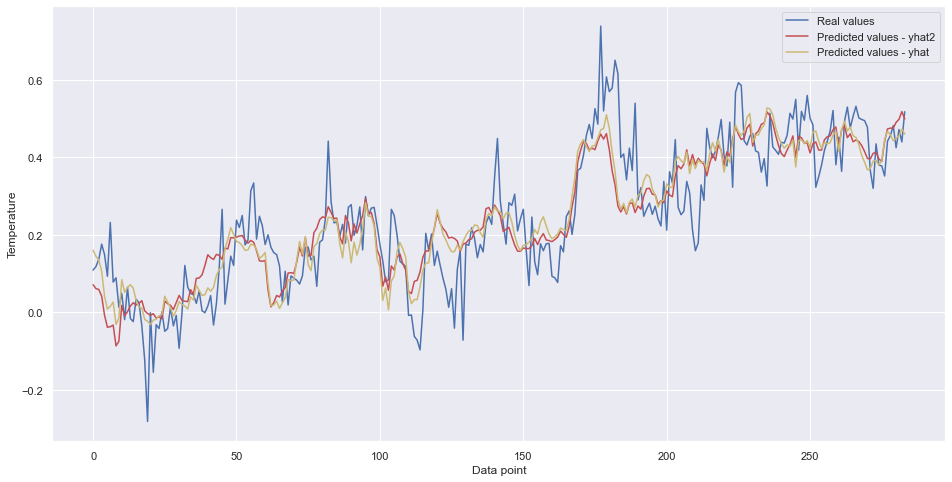

In [29]:
### plot the difference between the yhat and y 
plt.figure(figsize = [16, 8])
plt.plot(y, color = 'b', label = 'Real values')
plt.plot(yhat2, color = 'r', label = 'Predicted values - yhat2')
plt.plot(yhat, color = 'y', label = 'Predicted values - yhat')
plt.xlabel('Data point')
plt.ylabel('Temperature')
plt.legend()
plt.show();

2.e USe step algorithm to get the best model parameters 

Construct a model with the outcome of the step function in ml3

In [30]:
lm3 = sm.OLS(cl_training['Temp'],cl_training[['intercept', 'CO2', 'MEI', 'Aerosols', 'TSI']])
result3 = lm3.fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Temp   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     192.1
Date:                Fri, 16 Apr 2021   Prob (F-statistic):           7.36e-79
Time:                        20:40:02   Log-Likelihood:                 270.59
No. Observations:                 284   AIC:                            -531.2
Df Residuals:                     279   BIC:                            -512.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   -118.6016     19.906     -5.958      0.000    -157.787     -79.416
CO2            0.0107      0.001     19.777      0.000       0.010       0.012
MEI            0.0620      0.007      9.438      0.000       0.049       0.075
Aerosols      -1.5844      0.217     -7.303      0.000      -2.011      -1.157
TSI            0.0842      0.015      5.764      0.000       0.055       0.113
==============================================================================
Omnibus:                       14.491   Durbin-Watson:                   0.891
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.210
Skew:                           0.444   Prob(JB):                     0.000183
Kurtosis:                       3.817   Cond. No.                     5.03e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.03e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
# the predicted label is yhat2
yhat3 = result3.predict(cl_training[['intercept', 'CO2', 'MEI', 'Aerosols', 'TSI']])

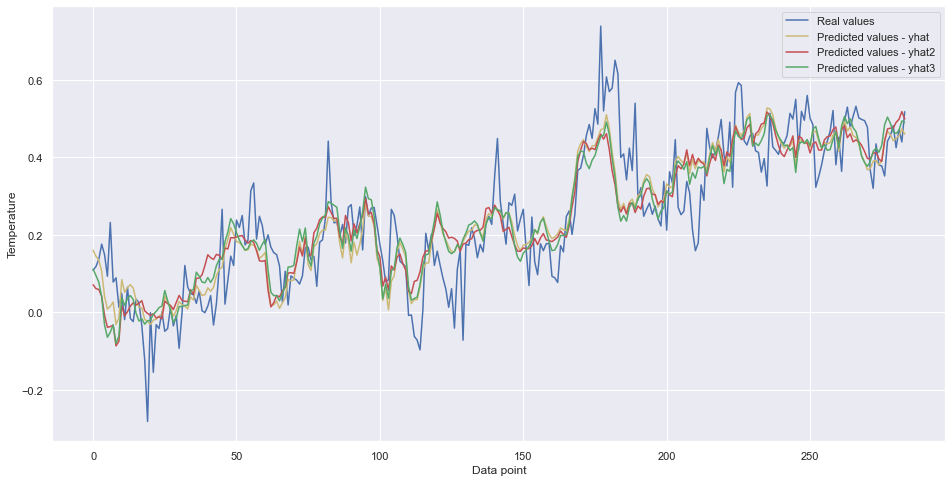

In [32]:
### plot the difference between the yhat and y 
plt.figure(figsize = [16, 8])
plt.plot(y, color = 'b', label = 'Real values')
plt.plot(yhat, color = 'y', label = 'Predicted values - yhat')
plt.plot(yhat2, color = 'r', label = 'Predicted values - yhat2')
plt.plot(yhat3, color = 'g', label = 'Predicted values - yhat3')
plt.xlabel('Data point')
plt.ylabel('Temperature')
plt.legend()
plt.show();